In [1]:
from fastai.text.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [4]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [6]:
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [7]:
from PIL import Image
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255,
         254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  4

In [9]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [11]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors),len(seven_tensors)

(6131, 6265)

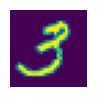

In [12]:
_ = show_image(three_tensors[19])

In [13]:
sevens_stacked = torch.stack(seven_tensors).float()/255
threes_stacked = torch.stack(three_tensors).float()/255
threes_stacked.shape, sevens_stacked.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [14]:
sevens_stacked

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

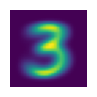

In [15]:
mean3 = threes_stacked.mean(0)
_ = show_image(mean3)

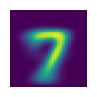

In [16]:
mean7 = sevens_stacked.mean(0)
_ = show_image(mean7)

Difference between sample and ideal number

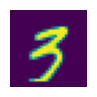

In [17]:
sample3 = threes_stacked[7]
_ = show_image(sample3)

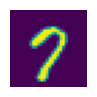

In [18]:
sample7 = sevens_stacked[3]
_ = show_image(sample7)

1. Mean absolute

In [19]:
def mean_absolute(ideal, sample):
    return (ideal - sample).abs().mean((-1, -2))

error3 = mean_absolute(mean3, sample3)
error7 = mean_absolute(mean7, sample7)

error37 = mean_absolute(mean3, sample7)
error73 = mean_absolute(mean7, sample3)
error3, error7, error37, error73

(tensor(0.1414), tensor(0.0909), tensor(0.1539), tensor(0.1323))

2. Root mean squared error

In [20]:
def rmse(ideal, sample):
    return (((ideal - sample)**2).mean())**0.5

error3 = rmse(mean3, sample3)
error7 = rmse(mean7, sample7)

error37 = rmse(mean3, sample7)
error73 = rmse(mean7, sample3)
error3, error7, error37, error73

(tensor(0.2557), tensor(0.1792), tensor(0.2791), tensor(0.2604))

In [21]:
F.l1_loss(sample7, mean7), F.mse_loss(sample7, mean7).sqrt()

(tensor(0.0909), tensor(0.1792))

In [22]:
valid_3_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls().sorted()])/255
valid_7_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls().sorted()])/255
valid_3_tensors.shape,valid_7_tensors.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [23]:
mean_absolute(mean3, valid_3_tensors[1]), mean_absolute(mean7, valid_3_tensors[1])

(tensor(0.1623), tensor(0.1958))

In [24]:
valid_3_error = mean_absolute(mean3, valid_3_tensors)
valid_7_error = mean_absolute(mean7, valid_7_tensors)
valid_3_error, valid_7_error

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 tensor([0.0874, 0.0971, 0.1050,  ..., 0.0893, 0.0983, 0.0977]))

In [25]:
def is_3():
    return mean_absolute(mean3, valid_3_tensors) < mean_absolute(mean7, valid_3_tensors)
def is_7():
    return mean_absolute(mean7, valid_7_tensors) < mean_absolute(mean3, valid_7_tensors)
acc_3s = is_3().float().mean()
acc_7s = is_7().float().mean()
acc_3s, acc_7s, (acc_3s+acc_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))